In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, accuracy_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix as cm

In [2]:
df = pd.read_csv("C:\\Users\\91996\\Documents\\Fall_22-DM-ML\\Project\\heart_2020.csv")
print(df.shape)
# strip column names
df=df.rename(columns=lambda x: x.strip())
cols=df.columns
# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))

(319795, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80-100,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
5,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
6,No,21.63,No,No,No,15,0,No,Female,70-74,White,No,Yes,Fair,4,Yes,No,Yes
7,No,31.64,Yes,No,No,5,0,Yes,Female,80-100,White,Yes,No,Good,9,Yes,No,No
8,No,26.45,No,No,No,0,0,No,Female,80-100,White,"No, borderline diabetes",No,Fair,5,No,Yes,No
9,No,40.69,No,No,No,0,0,Yes,Male,65-69,White,No,Yes,Good,10,No,No,No


In [3]:
# Data Cleaning
num_cols = df.select_dtypes(exclude='object').columns
obj_cols = df.select_dtypes(include='object').columns[1:]

In [4]:
# Checking unique values
print("Unique Values for categorical columns:")
for col in df.select_dtypes(include='object'):
  print(f"  - {col}: {df[col].unique()}\n")

Unique Values for categorical columns:
  - HeartDisease: ['No' 'Yes']

  - Smoking: ['Yes' 'No']

  - AlcoholDrinking: ['No' 'Yes']

  - Stroke: ['No' 'Yes']

  - DiffWalking: ['No' 'Yes']

  - Sex: ['Female' 'Male']

  - AgeCategory: ['55-59' '80-100' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54' '45-49'
 '18-24' '35-39' '30-34' '25-29']

  - Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

  - Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

  - PhysicalActivity: ['Yes' 'No']

  - GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']

  - Asthma: ['Yes' 'No']

  - KidneyDisease: ['No' 'Yes']

  - SkinCancer: ['Yes' 'No']



In [5]:
#Checking for empty or null values
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())

ColumnName, DataType, MissingValues
HeartDisease , object , False
BMI , float64 , False
Smoking , object , False
AlcoholDrinking , object , False
Stroke , object , False
PhysicalHealth , int64 , False
MentalHealth , int64 , False
DiffWalking , object , False
Sex , object , False
AgeCategory , object , False
Race , object , False
Diabetic , object , False
PhysicalActivity , object , False
GenHealth , object , False
SleepTime , int64 , False
Asthma , object , False
KidneyDisease , object , False
SkinCancer , object , False


In [6]:
# Encoding labels
c = df['HeartDisease'] 
le = preprocessing.LabelEncoder()
le.fit(c)
c_encoded = le.transform(c) 
df['HeartDisease'] = c_encoded

d = df['Smoking'] 
le = preprocessing.LabelEncoder()
le.fit(d)
d_encoded = le.transform(d) 
df['Smoking'] = d_encoded

e = df['AlcoholDrinking'] 
le = preprocessing.LabelEncoder()
le.fit(e)
e_encoded = le.transform(e) 
df['AlcoholDrinking'] = e_encoded

f = df['Stroke'] 
le = preprocessing.LabelEncoder()
le.fit(f)
f_encoded = le.transform(f) 
df['Stroke'] = f_encoded

g = df['DiffWalking'] 
le = preprocessing.LabelEncoder()
le.fit(g)
g_encoded = le.transform(g) 
df['DiffWalking'] = g_encoded

h = df['PhysicalActivity'] 
le = preprocessing.LabelEncoder()
le.fit(h)
h_encoded = le.transform(h) 
df['PhysicalActivity'] = h_encoded

i = df['Asthma'] 
le = preprocessing.LabelEncoder()
le.fit(i)
i_encoded = le.transform(i) 
df['Asthma'] = i_encoded

j = df['KidneyDisease'] 
le = preprocessing.LabelEncoder()
le.fit(j)
j_encoded = le.transform(j) 
df['KidneyDisease'] = j_encoded

p = df['SkinCancer'] 
le = preprocessing.LabelEncoder()
le.fit(p)
p_encoded = le.transform(p) 
df['SkinCancer'] = p_encoded

q = df['Sex'] 
le = preprocessing.LabelEncoder()
le.fit(q)
q_encoded = le.transform(q) 
df['Sex'] = q_encoded

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index(drop=True)

<AxesSubplot:>

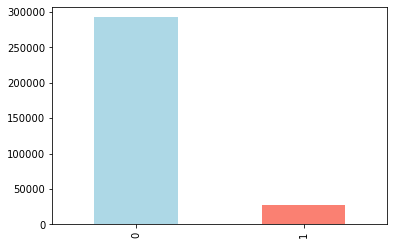

In [7]:
# Exploratory Data Analysis

# EDA helps us to observe and analyse the data to see what we are going to work with. The goal here is to learn more about the data.
# EDA also helps us find answers to some important questions such as:
# What kind of data do we have and how do we handle the different types? What is missing in the data and how do you deal with it? Etc.

df.HeartDisease.value_counts().plot(kind="bar", color=["lightblue", "salmon"])

#### Obervation from the above plot:
#### We have close to 300,000 people with no heart disease and roughly around 25,000 people with heart disease.

#### Also, the data is imbalanced, we will use SMOTE for imbalance issue for Evaluation or Machine learning models.

In [15]:
# Unique Values
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 9:
        categorical_val.append(column)
    else:
        continous_val.append(column)


HeartDisease : [0 1]
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking : [1 0]
AlcoholDrinking : [0 1]
Stroke : [0 1]
PhysicalHealth : [ 3  0 20 28  6 15  5 30  7  1  2 21  4 10 14 18  8 25 16 29 27 17 24 12
 23 26 22 19  9 13 11]
MentalHealth : [30  0  2  5 15  8  4  3 10 14 20  1  7 24  9 28 16 12  6 25 17 18 21 29
 22 13 23 27 26 11 19]
DiffWalking : [0 1]
Sex : [0 1]
AgeCategory : ['55-59' '80-100' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54' '45-49'
 '18-24' '35-39' '30-34' '25-29']
Race : ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic : ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity : [1 0]
GenHealth : ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime : [ 5  7  8  6 12  4  9 10 15  3  2  1 16 18 14 20 11 13 17 24 19 21 22 23]
Asthma : [1 0]
KidneyDisease : [0 1]
SkinCancer : [1 0]


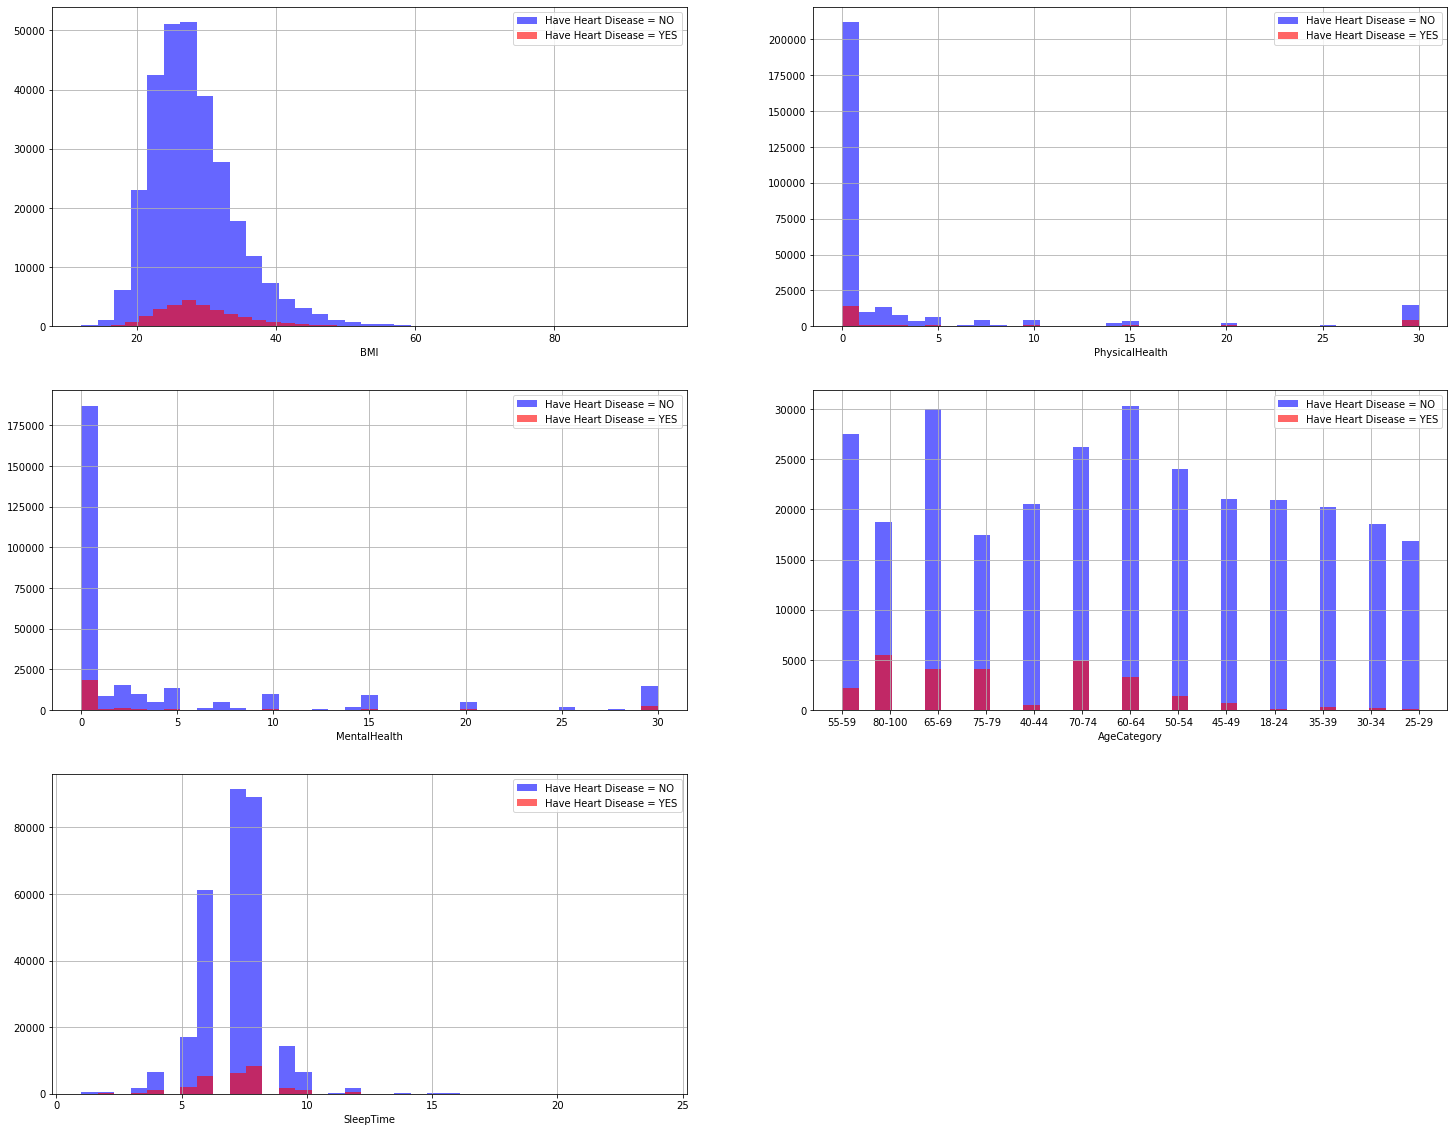

In [16]:
plt.figure(figsize=(25, 20))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["HeartDisease"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["HeartDisease"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

#### Observation from the above plots:
#### i). In Age-category, people above 60 years are more prone to disease.
#### ii). Physical health: With no to less exercise can cause heart problems.
#### iii). It is observed that BMI between 25.00 to 40.00 or more than 40.00 leads to heart issues.
#### iv). Sleep time: It is observed that, those individuals who has difficulty in sleeping early or individuals those who goes to bed after mid-night are on a higher risk of heart disease.

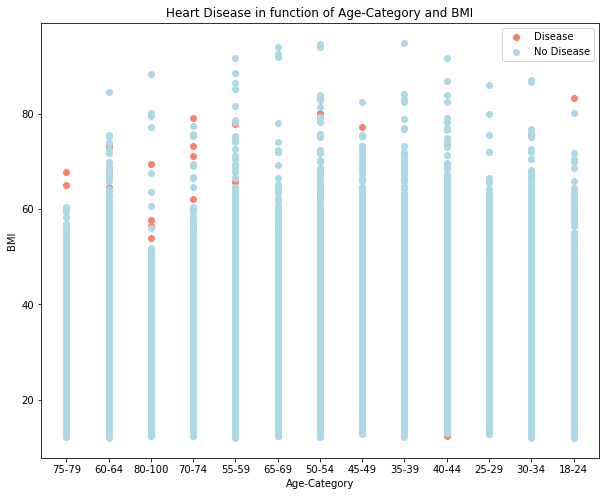

In [17]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.AgeCategory[df.HeartDisease==1],
            df.BMI[df.HeartDisease==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.AgeCategory[df.HeartDisease==0],
            df.BMI[df.HeartDisease==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age-Category and BMI")
plt.xlabel("Age-Category")
plt.ylabel("BMI")
plt.legend(["Disease", "No Disease"]);

In [18]:
# Data transformation

# Convert all nominal variables to binary variables
df_num=df.copy(deep=True) 
# create new binary columns
df_dummies=pd.get_dummies(df_num[['Race','Diabetic','GenHealth']])
# add them to dataframe
df_num=df_num.join(df_dummies)
# drop original columns
df_num=df_num.drop('Race',axis=1)
df_num=df_num.drop('Diabetic', axis=1)
df_num=df_num.drop('GenHealth', axis=1)

# Unique values of df_num
categorical_val = []
continous_val = []
for column in df_num.columns:
    print('==============================')
    print(f"{column} : {df_num[column].unique()}")
    if len(df_num[column].unique()) <= 9:
        categorical_val.append(column)
    else:
        continous_val.append(column)

HeartDisease : [0 1]
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking : [1 0]
AlcoholDrinking : [0 1]
Stroke : [0 1]
PhysicalHealth : [ 3  0 20 28  6 15  5 30  7  1  2 21  4 10 14 18  8 25 16 29 27 17 24 12
 23 26 22 19  9 13 11]
MentalHealth : [30  0  2  5 15  8  4  3 10 14 20  1  7 24  9 28 16 12  6 25 17 18 21 29
 22 13 23 27 26 11 19]
DiffWalking : [0 1]
Sex : [0 1]
AgeCategory : ['55-59' '80-100' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54' '45-49'
 '18-24' '35-39' '30-34' '25-29']
PhysicalActivity : [1 0]
SleepTime : [ 5  7  8  6 12  4  9 10 15  3  2  1 16 18 14 20 11 13 17 24 19 21 22 23]
Asthma : [1 0]
KidneyDisease : [0 1]
SkinCancer : [1 0]
Race_American Indian/Alaskan Native : [0 1]
Race_Asian : [0 1]
Race_Black : [0 1]
Race_Hispanic : [0 1]
Race_Other : [0 1]
Race_White : [1 0]
Diabetic_No : [0 1]
Diabetic_No, borderline diabetes : [0 1]
Diabetic_Yes : [1 0]
Diabetic_Yes (during pregnancy) : [0 1]
GenHealth_Excellent : [0 1]
GenHealth_Fair : [0 1]
GenHealth_Good :

<AxesSubplot:title={'center':'Correlation with HeartDisease'}>

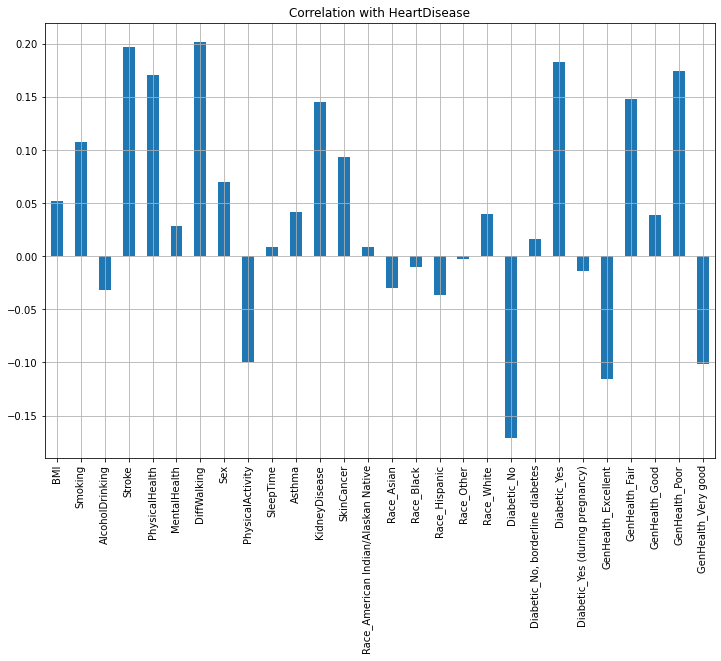

In [19]:
df_num.drop('HeartDisease', axis=1).corrwith(df.HeartDisease).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with HeartDisease")

#### Observations from the above correlation:
#### 1. Race_other is the least correlated with the HeartDisease variable.
#### 2. All other variables have a significant correlation with the HeartDisease variable.

In [56]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for x in df_num.columns:
    if df_num[x].dtype=='object':
        df_num[x]=enc.fit_transform(df_num[x])

In [25]:
# Code to handle solve imbalance issue

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(29, input_dim=29, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [26]:
X = df_num.drop('HeartDisease',axis='columns')
y = df_num['HeartDisease']

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

0    292422
1    292422
Name: HeartDisease, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=15, stratify=y_sm)

# Number of classes in training Data
y_train.value_counts()


y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
13708/13708 [==============================] - 28s 2ms/step - loss: 0.3963 - accuracy: 0.8117
Epoch 2/100
13708/13708 [==============================] - 26s 2ms/step - loss: 0.3643 - accuracy: 0.8248
Epoch 3/100
13708/13708 [==============================] - 26s 2ms/step - loss: 0.3554 - accuracy: 0.8281
Epoch 4/100
13708/13708 [==============================] - 26s 2ms/step - loss: 0.3528 - accuracy: 0.8295
Epoch 5/100
13708/13708 [==============================] - 26s 2ms/step - loss: 0.3511 - accuracy: 0.8303
Epoch 6/100
13708/13708 [==============================] - 27s 2ms/step - loss: 0.3499 - accuracy: 0.8310
Epoch 7/100
13708/13708 [==============================] - 27s 2ms/step - loss: 0.3488 - accuracy: 0.8316
Epoch 8/100
13708/13708 [==============================] - 27s 2ms/step - loss: 0.3486 - accuracy: 0.8316
Epoch 9/100
13708/13708 [==============================] - 28s 2ms/step - loss: 0.3481 - accuracy: 0.8321
Epoch 10/100
13708/13708 [====================

13708/13708 [==============================] - 27s 2ms/step - loss: 0.3427 - accuracy: 0.8354
Epoch 78/100
13708/13708 [==============================] - 27s 2ms/step - loss: 0.3425 - accuracy: 0.8356
Epoch 79/100
13708/13708 [==============================] - 27s 2ms/step - loss: 0.3427 - accuracy: 0.8351
Epoch 80/100
13708/13708 [==============================] - 27s 2ms/step - loss: 0.3427 - accuracy: 0.8354
Epoch 81/100
13708/13708 [==============================] - 27s 2ms/step - loss: 0.3427 - accuracy: 0.8353
Epoch 82/100
13708/13708 [==============================] - 17s 1ms/step - loss: 0.3425 - accuracy: 0.8352
Epoch 83/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.3425 - accuracy: 0.8352
Epoch 84/100
13708/13708 [==============================] - 17s 1ms/step - loss: 0.3424 - accuracy: 0.8352
Epoch 85/100
13708/13708 [==============================] - 17s 1ms/step - loss: 0.3424 - accuracy: 0.8355
Epoch 86/100
13708/13708 [========================

In [55]:
# 01. Logistic regression

# Logistic regression is a simple and more efficient method for binary and linear classification problems.
# It is a classification model, and achieves very good performance with linearly separable classes.
# It is an extensively employed algorithm for classification in industry.


from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, accuracy_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix as cm

x=df_num.drop('HeartDisease',axis=1)
y=df_num['HeartDisease']

# by hold-out evaluation
model1_LR=LogisticRegression(penalty='l2',solver='lbfgs') # get instance of model
model1_LR=model1_LR.fit(X_train, y_train) # Train/Fit model
y_pred=model1_LR.predict(X_test) # get y predictions

confM = cm(y_test, y_pred)
print(confM)

acc=accuracy_score(y_test, y_pred)
pre=precision_score(y_test, y_pred, average='macro')
rec=recall_score(y_pred, y_test, average='macro')
print('\nAccuracy, Precision & Recall obtained from Logistic Regression: ')
print('Accuracy = ',acc)
print('Precision = ', pre)
print('Recall = ', rec)

[[61217 11889]
 [13644 59461]]

Accuracy, Precision & Recall obtained from Logistic Regression: 
Accuracy =  0.8253688162997312
Precision =  0.8255564616757091
Recall =  0.8255564616757091


In [34]:
# Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 02. K-NN

# The k-nearest neighbours algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier.
# It uses proximity to make classifications or predictions about the grouping of an individual data point.


from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, precision_score, accuracy_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix as cm
model2_KNN = KNeighborsClassifier(metric='euclidean') # get instance of model
model2_KNN.fit(X_train, y_train) # Train/Fit model 

y_pred2 = model2_KNN.predict(X_test) # get y predictions
acc2=accuracy_score(y_pred2, y_test)
pre2=precision_score(y_pred2, y_test, average='macro')
rec2=recall_score(y_pred2, y_test, average='macro')
print('\nAccuracy, Precision & Recall obtained from KNN: ')
print('Accuracy = ',acc2)
print('Precision = ', pre2)
print('Recall = ', rec2)


Accuracy, Precision & Recall obtained from KNN: 
Accuracy =  0.8704953799645717
Precision =  0.8704956599237192
Recall =  0.8729951929001001


In [35]:
#03. Decision Trees


# Decision Trees are supervised learning method used for classification and regression.
# Simple to understand and to interpret. 
# Requires little data preparation. 
# Able to handle both numerical and categorical data. 
# Able to handle multi-output problems.



from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score


y = df_num['HeartDisease']
x = df_num.drop('HeartDisease', axis=1)

# by hold-out evaluation
model3_DT=DecisionTreeClassifier(criterion='entropy', max_depth=10, ccp_alpha = 0.1)  # get instance of model
model3_DT=model3_DT.fit(X_train, y_train)  # Train/Fit model 
y_pred3=model3_DT.predict(X_test) # get y predictions
acc3=accuracy_score(y_pred3, y_test)
pre3=precision_score(y_pred3, y_test, average='macro')
rec3=recall_score(y_pred3, y_test, average='macro')
print('\nAccuracy, Precision & Recall obtained from Decision Trees: ')
print('Accuracy = ',acc3)
print('Precision = ', pre3)
print('Recall = ', rec3)


Accuracy, Precision & Recall obtained from Decision Trees: 
Accuracy =  0.6646011585995582
Precision =  0.6646029281417232
Recall =  0.7247922541367064


In [36]:
# 04. Support Vector Machine


# Support vector machines are a set of supervised learning methods used for classification, regression and outliers detection.
# SVMs were originally designed for binary classifications.
# SVM can also be used for multi-class classifications.
# SVM require a numerical feature space to be run. 
# Normalization is not required


from sklearn.svm import SVC


# by hold-out evaluation
model4_SVM=SVC(kernel='linear', C=0.1, max_iter=10) 
model4_SVM=model4_SVM.fit(X_train, y_train)
y_pred4=model4_SVM.predict(X_test)
acc4=accuracy_score(y_test, y_pred4)
pre4=precision_score(y_pred4, y_test, average='macro')
rec4=recall_score(y_pred4, y_test, average='macro')
print('\nAccuracy, Precision & Recall obtained from Support Vector Machine: ')
print('Accuracy = ',acc4)
print('Precision = ', pre4)
print('Recall = ', rec4)

C:\Users\91996\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Accuracy, Precision & Recall obtained from Support Vector Machine: 
Accuracy =  0.6114382638789148
Precision =  0.6114386878548276
Recall =  0.6131783102051883


In [37]:
# 05. RandomForest


# Random forest is a estimator that fits a number of decision tree classifiers on various sub-samples of the dataset.
# Random forest uses averaging to improve the predictive accuracy and control over-fitting. 



from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, accuracy_score, recall_score
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


x=df_num.drop('HeartDisease',axis=1)
y=df_num['HeartDisease']

# by hold-out evaluation
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
model5_RF=bag.fit(X_train, y_train)
y_pred5=model5_RF.predict(X_test)
acc5=accuracy_score(y_test, y_pred5)
pre5=precision_score(y_test, y_pred5, average='macro')
rec5=recall_score(y_pred5, y_test, average='macro')
print('\nAccuracy, Precision & Recall obtained from Random Forest: ')
print('Accuracy = ',acc5)
print('Precision = ', pre5)
print('Recall = ', rec5)


Accuracy, Precision & Recall obtained from Random Forest: 
Accuracy =  0.910068325912551
Precision =  0.9100929777420903
Recall =  0.9100929777420903


In [43]:
# 06. AdaBoosting


# AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional 
#copies of the classifier on the same dataset.
# The weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.



from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier() 
model6_AdB = AdaBoostClassifier(tree, n_estimators=50, random_state=0)
model6_AdB.fit(X_train, y_train)
precision = make_scorer(precision_score, average='macro')
y_pred6 = model6_AdB.predict(X_test)
acc6=accuracy_score(y_test, y_pred6)
pre6=precision_score(y_test, y_pred6, average='macro')
rec6=recall_score(y_pred6, y_test, average='macro')
print('\nAccuracy, Precision & Recall obtained from AdaBoosting: ')
print('Accuracy = ',acc6)
print('Precision = ', pre6)
print('Recall = ', rec6)


Accuracy, Precision & Recall obtained from AdaBoosting: 
Accuracy =  0.9029826757220729
Precision =  0.9031707150190709
Recall =  0.9031707150190709


In [44]:
# 07. XGBoost


# XGBoost is an optimized distributed gradient boosting library designed to be highly efficient and flexible. 
# XGBoost provides a parallel tree boosting that solve many data science problems in a fast and accurate way.


import xgboost
from xgboost import XGBClassifier

model7_XGB = XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
precision = make_scorer(precision_score, average='macro')
model7_XGB.fit(X_train, y_train)
y_pred7 = model7_XGB.predict(X_test)
acc7=accuracy_score(y_test, y_pred7)
pre7=precision_score(y_test, y_pred7, average='macro')
rec7=recall_score(y_pred7, y_test, average='macro')
print('\nAccuracy, Precision & Recall obtained from XGBoost: ')
print('Accuracy = ',acc7)
print('Precision = ', pre7)
print('Recall = ', rec7)

C:\Users\91996\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\91996\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:20:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy, Precision & Recall obtained from XGBoost: 
Accuracy =  0.820430747344591
Precision =  0.8213827674356909
Recall =  0.8213827674356909


In [53]:
# Predicting the target variable (HeartDisease) by only feeding features

display(HTML(df_num.head(10).to_html()))


# features1_No_HeartDisease=(23.71,0,0,0,28,0,1,0,4,1,8,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1)
# features2_has_HeartDisease=(28.87,1,0,0,6,0,1,0,11,0,12,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0)

input_features=(28.87,1,0,0,6,0,1,0,11,0,12,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0)
input_features_numpy_array = np.asarray(input_features)
input_features_reshape = input_features_numpy_array.reshape(1,-1)

prediction = model5_RF.predict(input_features_reshape)
print(prediction)

if(prediction[0]== 0):
    print('The person does not have Heart Disease.')
else:
    print('The person has Heart Disease.')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3,30,0,0,7,1,5,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0,0,0,0,12,1,7,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20,30,0,1,9,1,8,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0,0,0,0,11,0,6,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28,0,1,0,4,1,8,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
5,1,28.87,1,0,0,6,0,1,0,11,0,12,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
6,0,21.63,0,0,0,15,0,0,0,10,1,4,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
7,0,31.64,1,0,0,5,0,1,0,12,0,9,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
8,0,26.45,0,0,0,0,0,0,0,12,0,5,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
9,0,40.69,0,0,0,0,0,1,1,9,1,10,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0


[1]
The person has Heart Disease.


## Result

#### By comparing all models:

#### Random Forest and AdaBooosting models yielded high accuracy.
#### Whereas, XdBoost, Logistic Regression and SVM yielded less accuracy. 

## Conclusion

#### In this project, we have analysed heart disease dataset, which had 17 indicators of heart disease of 319,795 surveyed individuals in the United States. 
#### During our investigation we identified that age is a major factor in heart disease.
#### Furthermore, heart disease is more prominent in those individuals who has no physical activity, has BMI between 25-40 and suffers from some sort of mental illness.

## Future Scope

#### Unsupervised learning model can be implemented and compared with Supervised model.
#### The models can be regressively tested by changing the parameters.